In [3]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from IPython.display import HTML
import os

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('Min-Max Daily Analyse.csv', sep=';')
df.head()

,Date,Min,Max
0,6.2.2020,11.53,14.48
1,7.2.2020,9.13,14.56
2,8.2.2020,12.00,12.25
3,9.2.2020,11.96,12.00
4,10.2.2020,11.94,14.89


In [6]:
print(df.columns)

Index(['Date', 'Min', 'Max'], dtype='object')


In [7]:
print(df[['Max', 'Min']].head())


     Max    Min
0  14.48  11.53
1  14.56   9.13
2  12.25  12.00
3  12.00  11.96
4  14.89  11.94


In [13]:
df['Range'] = df['Max']-df['Min']
df.head()

,Date,Min,Max,Range
0,6.2.2020,11.53,14.48,2.95
1,7.2.2020,9.13,14.56,5.43
2,8.2.2020,12.00,12.25,0.25
3,9.2.2020,11.96,12.00,0.04
4,10.2.2020,11.94,14.89,2.95


In [15]:
import datetime

day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')  # Doğru formatı belirtin
df['Day'] = df['Date'].dt.day_name()  # Alternatif olarak, doğrudan day_name kullanabilirsiniz
df['Range'] = df['Max'] - df['Min']  # Eğer Range hesaplamasını da yapmanız gerekiyorsa

df = df[['Date', 'Day', 'Min', 'Max', 'Range']]
df.head()

,Date,Day,Min,Max,Range
0,2020-02-06,Thursday,11.53,14.48,2.95
1,2020-02-07,Friday,9.13,14.56,5.43
2,2020-02-08,Saturday,12.00,12.25,0.25
3,2020-02-09,Sunday,11.96,12.00,0.04
4,2020-02-10,Monday,11.94,14.89,2.95


In [21]:
df.describe()

,Date,Min,Max,Range
count,90,90.000000,90.000000,90.000000
mean,2020-03-21 12:00:00,11.510000,12.716444,1.206444
min,2020-02-06 00:00:00,7.200000,11.460000,0.040000
25%,2020-02-28 06:00:00,11.462500,11.970000,0.122500
50%,2020-03-21 12:00:00,11.800000,12.310000,0.250000
75%,2020-04-12 18:00:00,12.072500,12.625000,2.260000
max,2020-05-05 00:00:00,12.390000,14.890000,6.270000
std,NaN,1.012351,1.082936,1.598325


<Axes: xlabel='Date'>

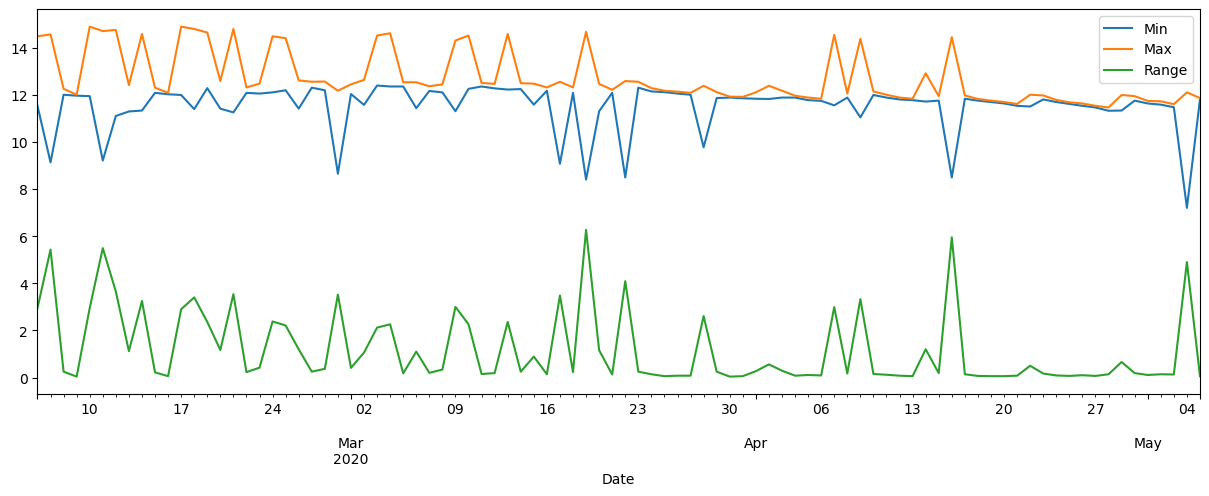

In [23]:
#df['ds'] = pd.to_datetime(df['Day'],  dayfirst = True)
df.plot(x='Date',   figsize=(15, 5))

In [25]:
def prediction_Prophet(feature):
  dfNew = pd.DataFrame()
  dfNew['ds'] = pd.to_datetime(df['Date'],  dayfirst = True)
  dfNew['y'] = df[[feature]].copy()
  
  #print(dfNew.tail())

  m = Prophet(daily_seasonality=True )
  m.fit(dfNew)
  horizon= 1
  future = m.make_future_dataframe(periods=horizon)
  forecast = m.predict(future)
  print('\nForcasted  {} values \n {}\n'.format(feature, forecast[['ds',  'yhat', 'yhat_lower', 'yhat_upper']].tail()))
  fig1 = m.plot(forecast)
  #fig2 = m.plot_components(forecast)
  return forecast

17:15:01 - cmdstanpy - INFO - Chain [1] start processing
17:15:01 - cmdstanpy - INFO - Chain [1] done processing



Forcasted  Range values 
            ds      yhat  yhat_lower  yhat_upper
86 2020-05-02 -0.302693   -1.914140    1.619077
87 2020-05-03 -0.372687   -2.264436    1.458989
88 2020-05-04  0.467309   -1.330974    2.162240
89 2020-05-05  0.908078   -0.962258    2.690837
90 2020-05-06 -0.010424   -1.739990    1.769409

Anamolies for range values
          Date       Day  Range  Range_By_Prophet
1  2020-02-07    Friday   5.43          4.116357
5  2020-02-11   Tuesday   5.49          4.570022
23 2020-02-29  Saturday   3.52          2.872971
42 2020-03-19  Thursday   6.27          3.638318
45 2020-03-22    Sunday   4.09          2.349896
51 2020-03-28  Saturday   2.61          2.249557
63 2020-04-09  Thursday   3.33          3.061789
70 2020-04-16  Thursday   5.95          2.885535
88 2020-05-04    Monday   4.90          2.162240


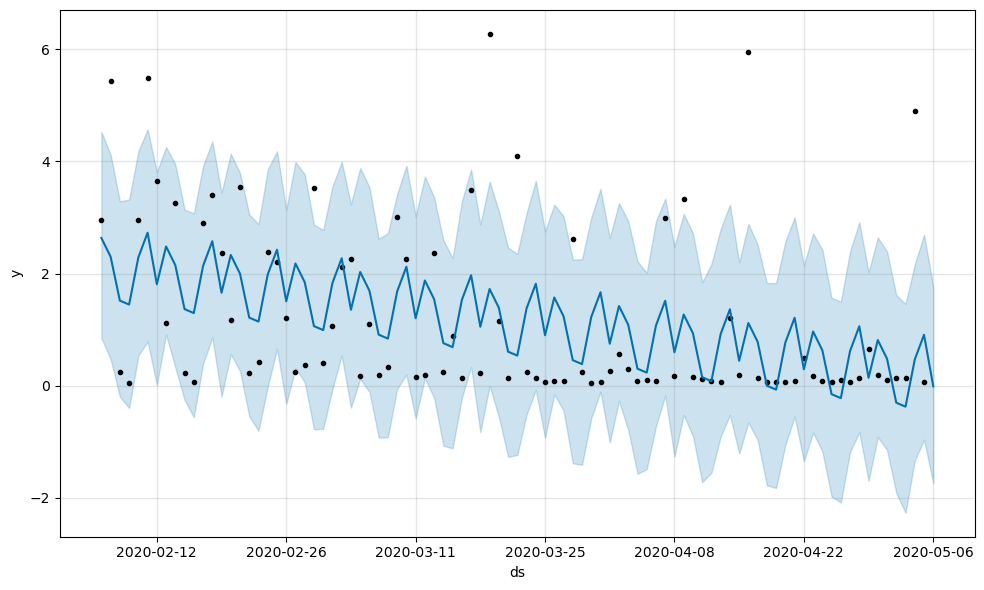

In [27]:
pred=prediction_Prophet('Range')

df['Range_By_Prophet']=pred['yhat_upper']

print('Anamolies for range values\n', df[df['Range']>df['Range_By_Prophet']][['Date','Day','Range','Range_By_Prophet']])

15:06:14 - cmdstanpy - INFO - Chain [1] start processing
15:06:14 - cmdstanpy - INFO - Chain [1] done processing



Forcasted  Min values 
            ds       yhat  yhat_lower  yhat_upper
86 2020-05-02  11.402336   10.157047   12.603001
87 2020-05-03  11.447727   10.188922   12.711521
88 2020-05-04  11.347683   10.047352   12.661942
89 2020-05-05  11.297657   10.135189   12.586888
90 2020-05-06  11.703489   10.315800   12.927821

Anamolies for min values
          Date       Day   Min  Min_By_Prophet
1  2020-02-07    Friday  9.13       10.340767
5  2020-02-11   Tuesday  9.21       10.249620
23 2020-02-29  Saturday  8.65       10.302250
40 2020-03-17   Tuesday  9.07       10.207329
42 2020-03-19  Thursday  8.40        9.962851
45 2020-03-22    Sunday  8.49       10.218228
51 2020-03-28  Saturday  9.77       10.325697
70 2020-04-16  Thursday  8.49       10.003497
88 2020-05-04    Monday  7.20       10.047352


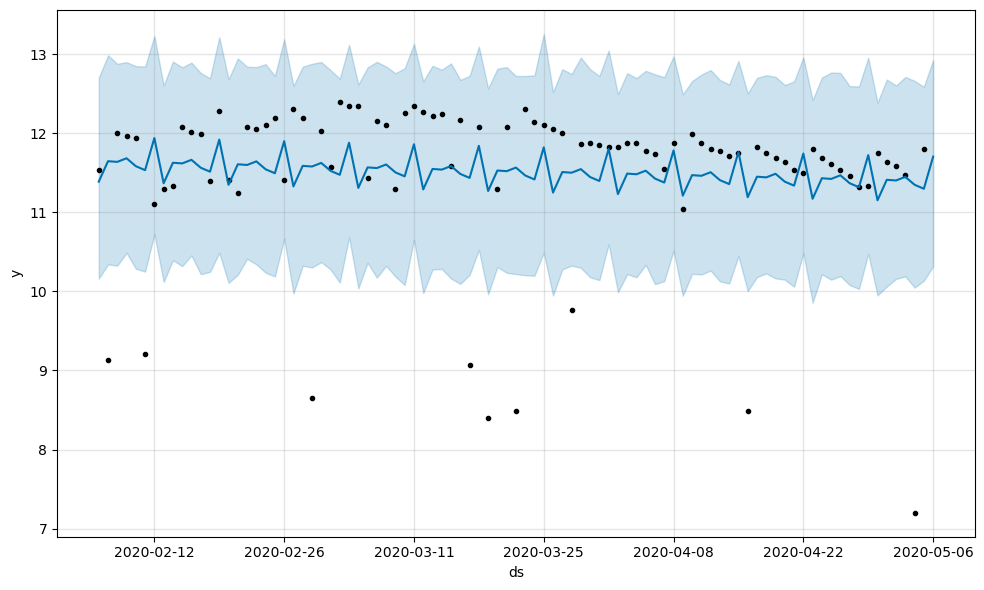

In [54]:
pred=prediction_Prophet('Min')

df['Min_By_Prophet']=pred['yhat_lower']
print('Anamolies for min values\n', df[df['Min']<df['Min_By_Prophet']][['Date','Day','Min','Min_By_Prophet']])

15:06:23 - cmdstanpy - INFO - Chain [1] start processing
15:06:23 - cmdstanpy - INFO - Chain [1] done processing



Forcasted  Max values 
            ds       yhat  yhat_lower  yhat_upper
86 2020-05-02  11.092664   10.093328   12.017941
87 2020-05-03  11.068081   10.098888   12.066307
88 2020-05-04  11.812582   10.785090   12.879786
89 2020-05-05  12.205810   11.135497   13.123364
90 2020-05-06  11.689976   10.674808   12.715535

Anamolies for Max values
          Date        Day    Max  Max_By_Prophet
6  2020-02-12  Wednesday  14.75       14.697306
11 2020-02-17     Monday  14.89       14.644266
13 2020-02-19  Wednesday  14.64       14.597927
15 2020-02-21     Friday  14.79       14.510109
18 2020-02-24     Monday  14.48       14.428755
27 2020-03-04  Wednesday  14.61       14.264236
32 2020-03-09     Monday  14.30       14.195086
36 2020-03-13     Friday  14.58       14.097772
42 2020-03-19   Thursday  14.67       13.968007
61 2020-04-07    Tuesday  14.54       13.858315
63 2020-04-09   Thursday  14.37       13.498975
70 2020-04-16   Thursday  14.44       13.339384


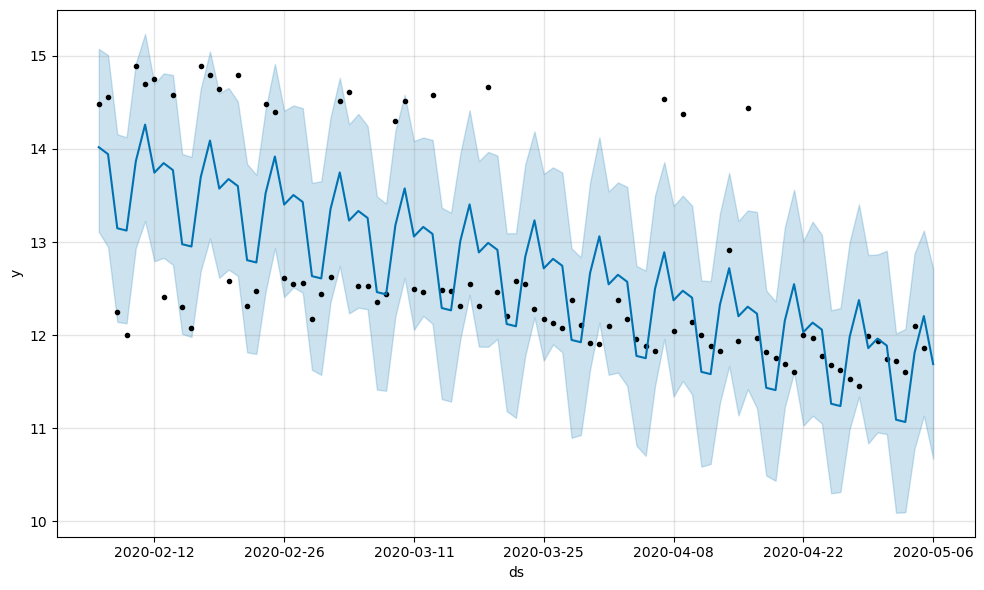

In [56]:
pred=prediction_Prophet('Max')

df['Max_By_Prophet']=pred['yhat_upper']
print('Anamolies for Max values\n', df[df['Max']>df['Max_By_Prophet']][['Date','Day','Max','Max_By_Prophet']])

<Axes: title={'center': 'comparison'}, xlabel='Date'>

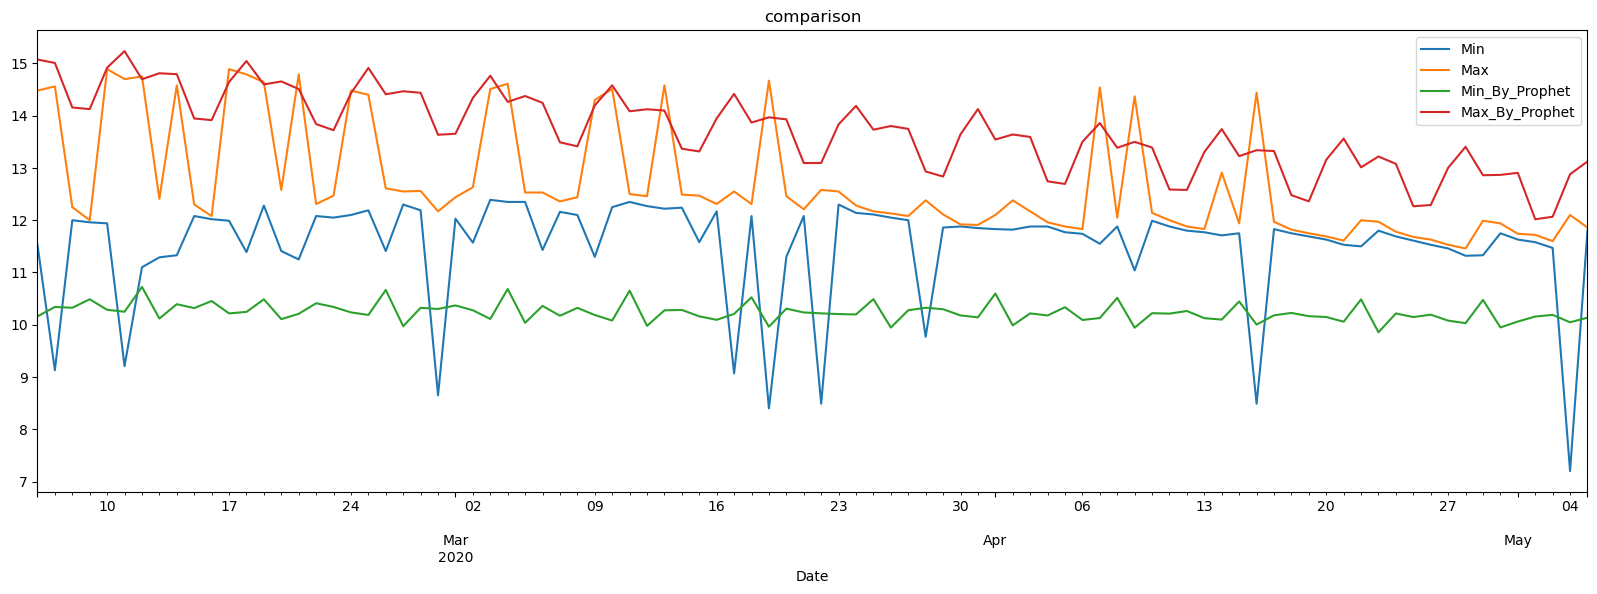

In [58]:

df.plot(title="comparison",x='Date',y=['Min','Max', 'Min_By_Prophet','Max_By_Prophet'],figsize=(20, 6))

<Axes: title={'center': 'comparison'}, xlabel='Date'>

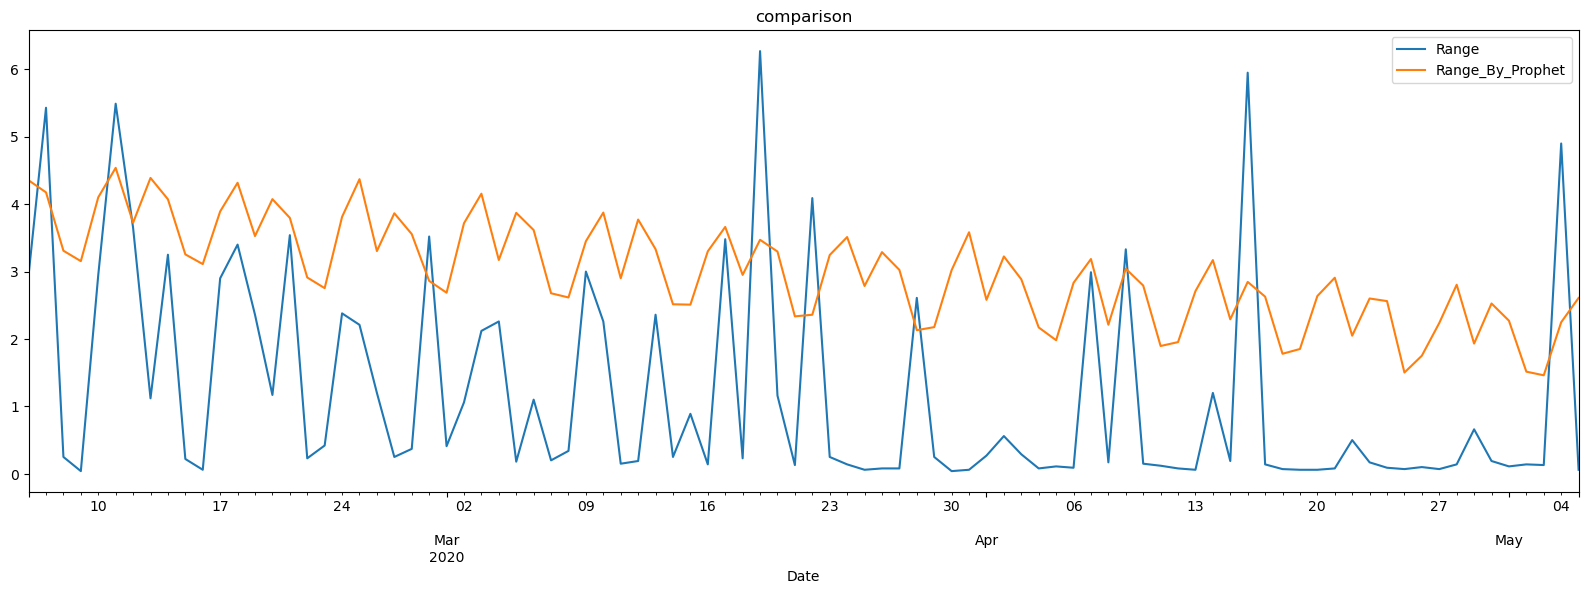

In [60]:
df.plot(title="comparison",x='Date',y=['Range','Range_By_Prophet'],figsize=(20, 6))

In [62]:
print('Mean of Min', df['Min'].mean())
print('Standart Deviation of Min', df['Min'].std())
print('Expected minimum value for of Min', df['Min'].mean()-2*df['Min'].std())
df['Min_Calculated']=df['Min'].mean()-2*df['Min'].std()
print('Anamolies for Min values\n', df[df['Min']<df['Min_Calculated']][['Date','Day','Min','Min_Calculated']])

Mean of Min 11.509999999999998
Standart Deviation of Min 1.0123506964408477
Expected minimum value for of Min 9.485298607118303
Anamolies for Min values
          Date       Day   Min  Min_Calculated
1  2020-02-07    Friday  9.13        9.485299
5  2020-02-11   Tuesday  9.21        9.485299
23 2020-02-29  Saturday  8.65        9.485299
40 2020-03-17   Tuesday  9.07        9.485299
42 2020-03-19  Thursday  8.40        9.485299
45 2020-03-22    Sunday  8.49        9.485299
70 2020-04-16  Thursday  8.49        9.485299
88 2020-05-04    Monday  7.20        9.485299


In [64]:
print('Mean of Max', df['Max'].mean())
print('Standart Deviation of Max', df['Max'].std())
print('Expected minimum value for of Max', df['Max'].mean()+2*df['Max'].std())
df['Max_Calculated']=df['Max'].mean()+2*df['Max'].std()
print('Anamolies for Max values\n', df[df['Max']>df['Max_Calculated']][['Date','Day','Max','Max_Calculated']])

Mean of Max 12.716444444444441
Standart Deviation of Max 1.0829364066850118
Expected minimum value for of Max 14.882317257814465
Anamolies for Max values
          Date     Day    Max  Max_Calculated
4  2020-02-10  Monday  14.89       14.882317
11 2020-02-17  Monday  14.89       14.882317


In [66]:
print('Mean of Range', df['Range'].mean())
print('Standart Deviation of Range', df['Range'].std())
maxRange=df['Range'].mean()+2*df['Range'].std()
print('Expected maximum value for of Range', maxRange)
df['Range_Calculated']=maxRange
print('Anamolies for Range values\n', df[df['Range']>df['Range_Calculated']][['Date','Day','Range','Range_Calculated']])

Mean of Range 1.2064444444444447
Standart Deviation of Range 1.5983251846089728
Expected maximum value for of Range 4.40309481366239
Anamolies for Range values
          Date       Day  Range  Range_Calculated
1  2020-02-07    Friday   5.43          4.403095
5  2020-02-11   Tuesday   5.49          4.403095
42 2020-03-19  Thursday   6.27          4.403095
70 2020-04-16  Thursday   5.95          4.403095
88 2020-05-04    Monday   4.90          4.403095


<Axes: title={'center': 'comparison'}, xlabel='Date'>

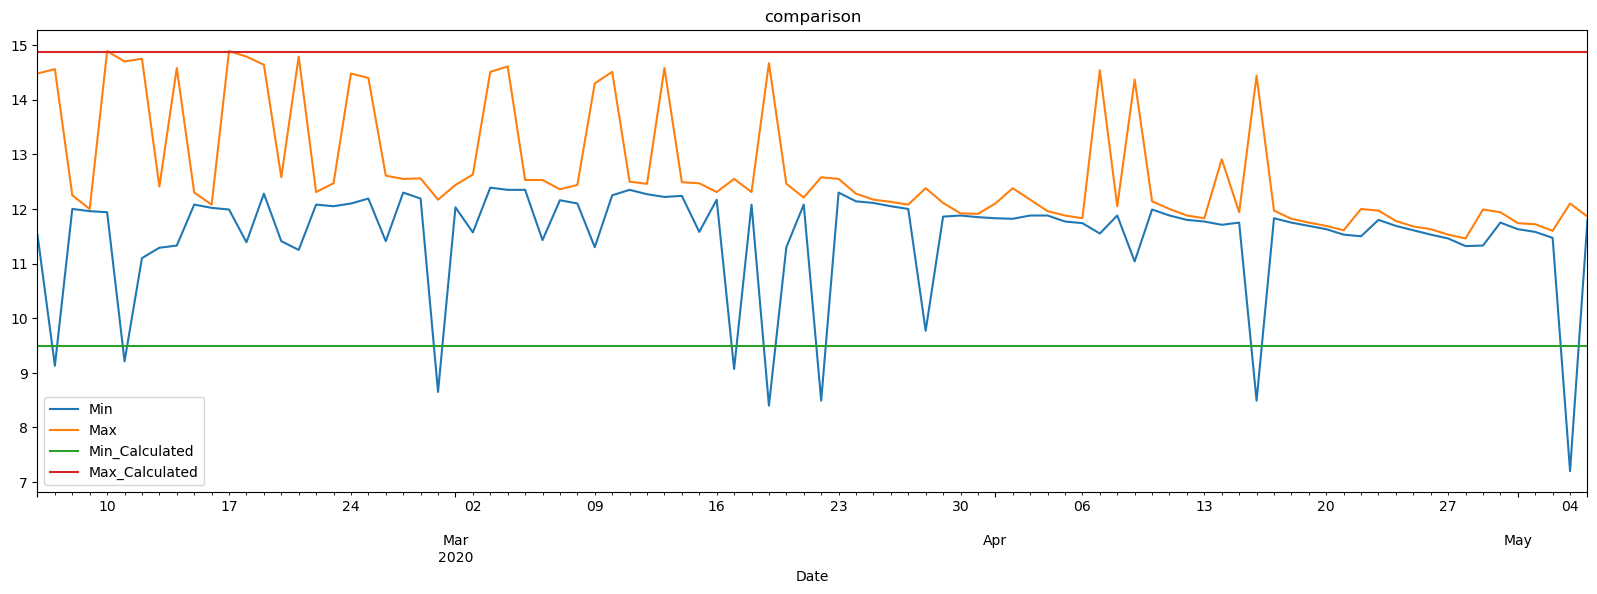

In [68]:
df.plot(title="comparison",x='Date',y=['Min','Max', 'Min_Calculated','Max_Calculated'],figsize=(20, 6))

<Axes: title={'center': 'Range'}, xlabel='Date'>

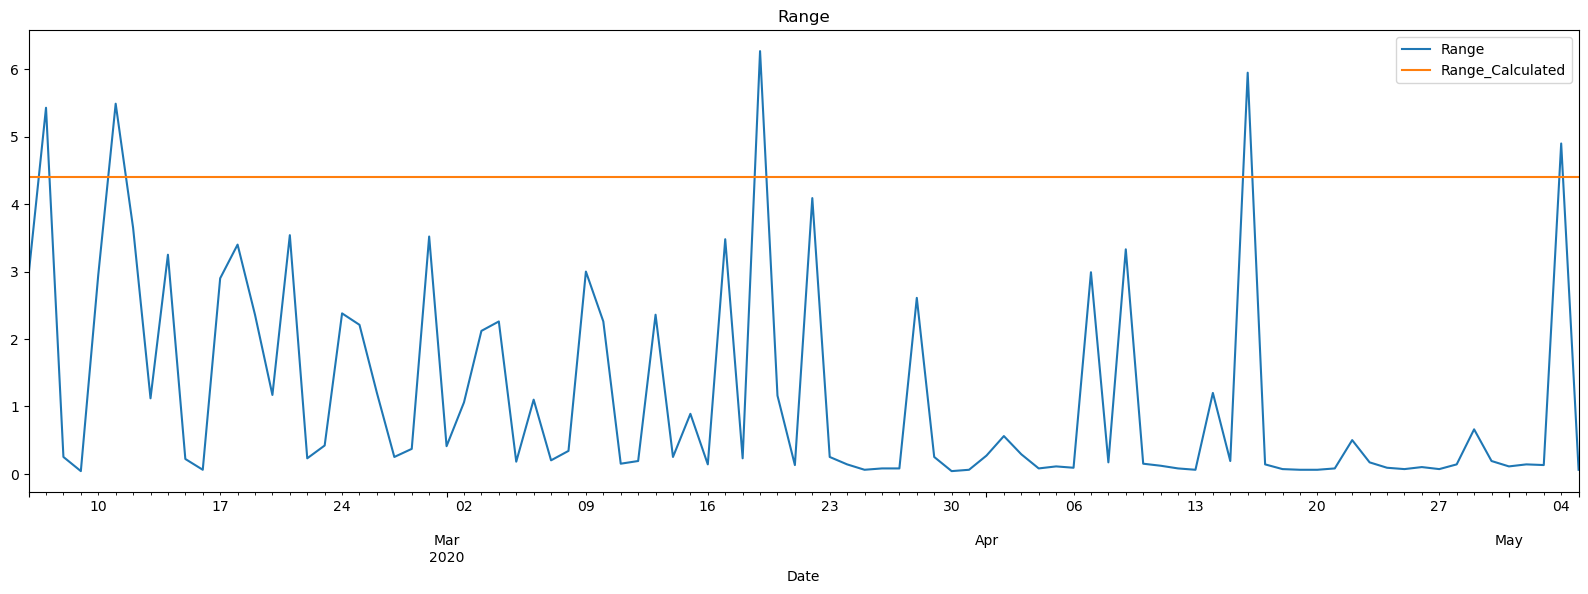

In [70]:
df.plot(title="Range",x='Date',y=['Range','Range_Calculated'],figsize=(20, 6))

In [96]:
CodesOfInterest = ['anomaly']

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

def showSummary(fontSize='12px'):
    summary = pd.DataFrame()

    # Anomalileri filtrele
    summary = anomaly[(anomaly.isin(CodesOfInterest) == True).any(axis=1)]
    
    # Stil ayarları
    styles = [
        hover(),
        dict(selector="th", props=[("font-size", fontSize),
                                   ("text-align", "center")]),
        dict(selector="tr", props=[("font-size", fontSize),
                                   ("text-align", "center")]),      
        dict(selector="caption", props=[("caption-side", "bottom")])
    ]
    
    # HTML tablosunu oluştur
    html = (summary.style.set_table_styles(styles)
            .set_caption("Hover to highlight."))
    
    # Anomali sayısını yazdır
    print('Number of detected anomalies: ', len(summary))
    
    return html


In [98]:
anomaly = pd.DataFrame()
anomaly = df[['Date','Day','Min','Max','Range']].copy()
anomaly['Min_anomaly_Prophet']= df['Min']
anomaly['Max_anomaly_Prophet']= df['Max']
anomaly['Range_anomaly_Prophet']=df['Range']

anomaly['Min_anomaly_Calculated']= df['Min']
anomaly['Max_anomaly_Calculated']= df['Max']
anomaly['Range_anomaly_Calculated']= df['Range']

In [100]:
df.columns

Index(['Date', 'Day', 'Min', 'Max', 'Range', 'Range_By_Prophet',
       'Min_By_Prophet', 'Max_By_Prophet', 'Min_Calculated', 'Max_Calculated',
       'Range_Calculated'],
      dtype='object')

In [102]:
anomaly['Min_anomaly_Prophet'][df['Min']<df['Min_By_Prophet']]= 'anomaly'
anomaly['Min_anomaly_Prophet'][df['Min']>=df['Min_By_Prophet']]= ''

anomaly['Max_anomaly_Prophet'][df['Max']>df['Max_By_Prophet']]= 'anomaly'
anomaly['Max_anomaly_Prophet'][df['Max']<=df['Max_By_Prophet']]= ''

anomaly['Range_anomaly_Prophet'][df['Range']>df['Range_By_Prophet']]= 'anomaly'
anomaly['Range_anomaly_Prophet'][df['Range']<=df['Range_By_Prophet']]= ''

anomaly['Min_anomaly_Calculated'][df['Min']<df['Min_Calculated']]= 'anomaly'
anomaly['Min_anomaly_Calculated'][df['Min']>=df['Min_Calculated']]= ''

anomaly['Max_anomaly_Calculated'][df['Max']>df['Max_Calculated']]= 'anomaly'
anomaly['Max_anomaly_Calculated'][df['Max']<=df['Max_Calculated']]= ''

anomaly['Range_anomaly_Calculated'][df['Range']>df['Range_Calculated']]= 'anomaly'
anomaly['Range_anomaly_Calculated'][df['Range']<=df['Range_Calculated']]= ''

In [104]:
showSummary('11px')

Number of detected anomalies:  20


,Date,Day,Min,Max,Range,Min_anomaly_Prophet,Max_anomaly_Prophet,Range_anomaly_Prophet,Min_anomaly_Calculated,Max_anomaly_Calculated,Range_anomaly_Calculated
1,2020-02-07 00:00:00,Friday,9.130000,14.560000,5.430000,anomaly,,anomaly,anomaly,,anomaly
4,2020-02-10 00:00:00,Monday,11.940000,14.890000,2.950000,,,,,anomaly,
5,2020-02-11 00:00:00,Tuesday,9.210000,14.700000,5.490000,anomaly,,anomaly,anomaly,,anomaly
6,2020-02-12 00:00:00,Wednesday,11.100000,14.750000,3.650000,,anomaly,,,,
11,2020-02-17 00:00:00,Monday,11.990000,14.890000,2.900000,,anomaly,,,anomaly,
13,2020-02-19 00:00:00,Wednesday,12.280000,14.640000,2.360000,,anomaly,,,,
15,2020-02-21 00:00:00,Friday,11.250000,14.790000,3.540000,,anomaly,,,,
18,2020-02-24 00:00:00,Monday,12.100000,14.480000,2.380000,,anomaly,,,,
23,2020-02-29 00:00:00,Saturday,8.650000,12.170000,3.520000,anomaly,,anomaly,anomaly,,
27,2020-03-04 00:00:00,Wednesday,12.350000,14.610000,2.260000,,anomaly,,,,


In [107]:
def predict_SMA(feature):
  window= 7
  sma = df[feature].rolling(window=window).mean()
  rstd = df[feature].rolling(window=window).std()
  bands = pd.DataFrame()
  bands['Date']=  (df['Date']).copy()
  bands['Date'] = pd.to_datetime(bands['Date'], dayfirst=True)
  bands['sma'] = sma 
  bands['lower'] = sma - 2 * rstd
  bands['upper'] = sma + 2 * rstd
  bands = bands.join(df[feature])
  bands = bands.set_index('Date')
  fig = plt.figure(figsize=(20, 6))
  ax = bands.plot(title=feature,  figsize=(20, 6))
  ax.fill_between(bands.index, bands['lower'], bands['upper'], color='#ADCCFF', alpha=0.4)
  ax.set_xlabel('Date')
  ax.set_ylabel(feature)
  ax.grid()
  plt.show()
  return bands

<Figure size 2000x600 with 0 Axes>

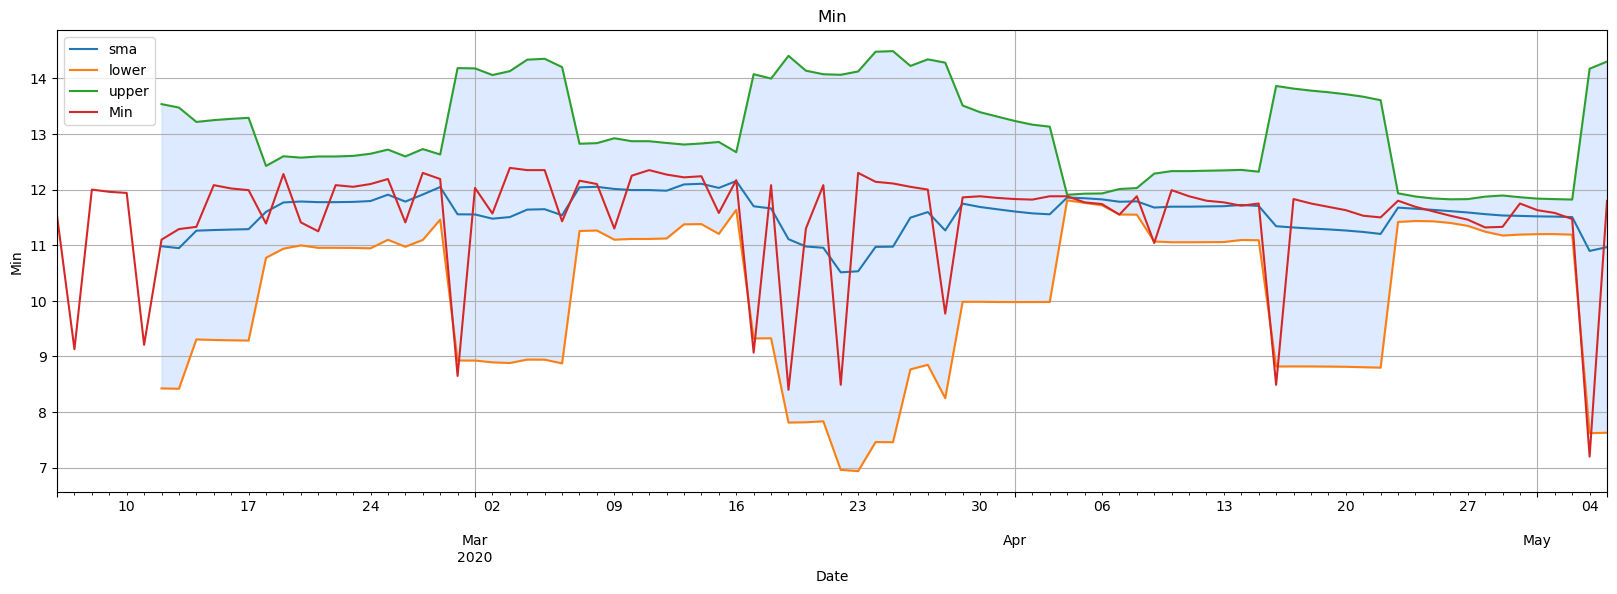

Anamolies for SMA_Min values
          Date    Min    Min_SMA
23 2020-02-29   8.65   8.927208
40 2020-03-17   9.07   9.324907
61 2020-04-07  11.55  11.552393
63 2020-04-09  11.04  11.067147
70 2020-04-16   8.49   8.819778
88 2020-05-04   7.20   7.621583


In [109]:
bands = predict_SMA('Min')
bands.reset_index(inplace=True)
min= df['Min'].min()
bands['lower'].fillna(min , inplace=True)
df['Min_SMA']= bands['lower'].copy()
print('Anamolies for SMA_Min values\n', df[df['Min']<df['Min_SMA']][['Date','Min', 'Min_SMA']])

<Figure size 2000x600 with 0 Axes>

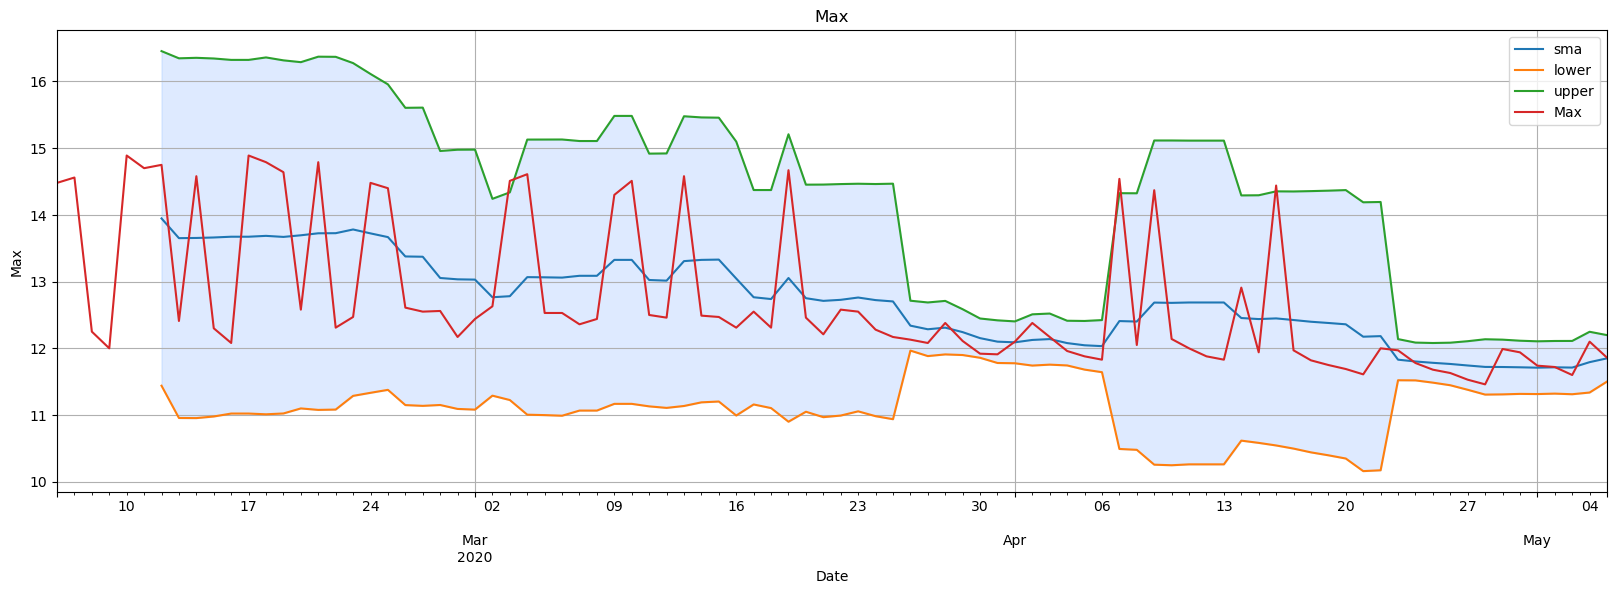

Anamolies for Max_SMA values
          Date    Max    Max_SMA
26 2020-03-03  14.51  14.337767
61 2020-04-07  14.54  14.325389
70 2020-04-16  14.44  14.352897


In [111]:
bands = predict_SMA('Max')
bands.reset_index(inplace=True)
max= df['Max'].max()
bands['upper'].fillna(max , inplace=True)

df['Max_SMA']= bands['upper'].copy()
print('Anamolies for Max_SMA values\n', df[df['Max']>df['Max_SMA']][['Date','Max', 'Max_SMA']])

<Figure size 2000x600 with 0 Axes>

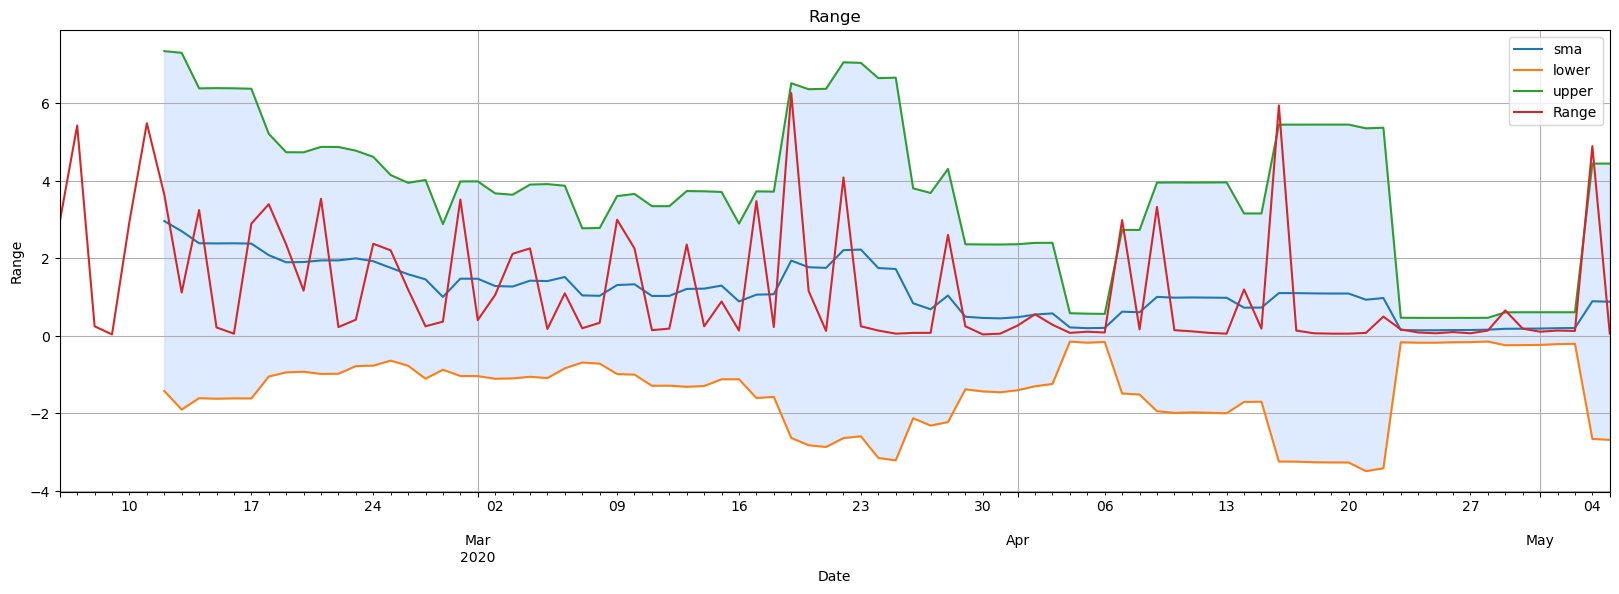

Anamolies for Range_SMA values
          Date  Range  Range_SMA
61 2020-04-07   2.99   2.738089
70 2020-04-16   5.95   5.454183
83 2020-04-29   0.66   0.610427
88 2020-05-04   4.90   4.448532


In [113]:
bands = predict_SMA('Range')
bands.reset_index(inplace=True)
max= df['Range'].max()
bands['upper'].fillna(max , inplace=True)
df['Range_SMA']= bands['upper'].copy()
print('Anamolies for Range_SMA values\n', df[df['Range']>=df['Range_SMA']][['Date','Range', 'Range_SMA']])

In [115]:
anomaly['Min_anomaly_SMA']= df['Min']
anomaly['Max_anomaly_SMA']= df['Max']
anomaly['Range_anomaly_SMA']= df['Range']

anomaly['Min_anomaly_SMA'][df['Min']<df['Min_SMA']]= 'anomaly'
anomaly['Min_anomaly_SMA'][df['Min']>=df['Min_SMA']]= ''

anomaly['Max_anomaly_SMA'][df['Max']>df['Max_SMA']]= 'anomaly'
anomaly['Max_anomaly_SMA'][df['Max']<=df['Max_SMA']]= ''

anomaly['Range_anomaly_SMA'][df['Range']>df['Range_SMA']]= 'anomaly'
anomaly['Range_anomaly_SMA'][df['Range']<=df['Range_SMA']]= ''

In [117]:
showSummary('10px')

Number of detected anomalies:  22


,Date,Day,Min,Max,Range,Min_anomaly_Prophet,Max_anomaly_Prophet,Range_anomaly_Prophet,Min_anomaly_Calculated,Max_anomaly_Calculated,Range_anomaly_Calculated,Min_anomaly_SMA,Max_anomaly_SMA,Range_anomaly_SMA
1,2020-02-07 00:00:00,Friday,9.130000,14.560000,5.430000,anomaly,,anomaly,anomaly,,anomaly,,,
4,2020-02-10 00:00:00,Monday,11.940000,14.890000,2.950000,,,,,anomaly,,,,
5,2020-02-11 00:00:00,Tuesday,9.210000,14.700000,5.490000,anomaly,,anomaly,anomaly,,anomaly,,,
6,2020-02-12 00:00:00,Wednesday,11.100000,14.750000,3.650000,,anomaly,,,,,,,
11,2020-02-17 00:00:00,Monday,11.990000,14.890000,2.900000,,anomaly,,,anomaly,,,,
13,2020-02-19 00:00:00,Wednesday,12.280000,14.640000,2.360000,,anomaly,,,,,,,
15,2020-02-21 00:00:00,Friday,11.250000,14.790000,3.540000,,anomaly,,,,,,,
18,2020-02-24 00:00:00,Monday,12.100000,14.480000,2.380000,,anomaly,,,,,,,
23,2020-02-29 00:00:00,Saturday,8.650000,12.170000,3.520000,anomaly,,anomaly,anomaly,,,anomaly,,
26,2020-03-03 00:00:00,Tuesday,12.390000,14.510000,2.120000,,,,,,,,anomaly,


In [119]:
def predict_EMA(feature):
  window= 3
  ema = df[feature].ewm(span=window,adjust=False).mean()
  rstd = df[feature].rolling(window=window).std()
  bands = pd.DataFrame()
  bands['Date']=  (df['Date']).copy()
  bands['Date'] = pd.to_datetime(bands['Date'], dayfirst=True)
  bands['ema'] = ema 
  bands['lower'] = ema - 2 * rstd
  bands['upper'] = ema + 2 * rstd
  bands = bands.join(df[feature])
  bands = bands.set_index('Date')
  fig = plt.figure(figsize=(20, 6))
  ax = bands.plot(title=feature,  figsize=(20, 6))
  ax.fill_between(bands.index, bands['lower'], bands['upper'], color='#ADCCFF', alpha=0.4)
  ax.set_xlabel('Date')
  ax.set_ylabel(feature)
  ax.grid()
  plt.show()
  return bands

<Figure size 2000x600 with 0 Axes>

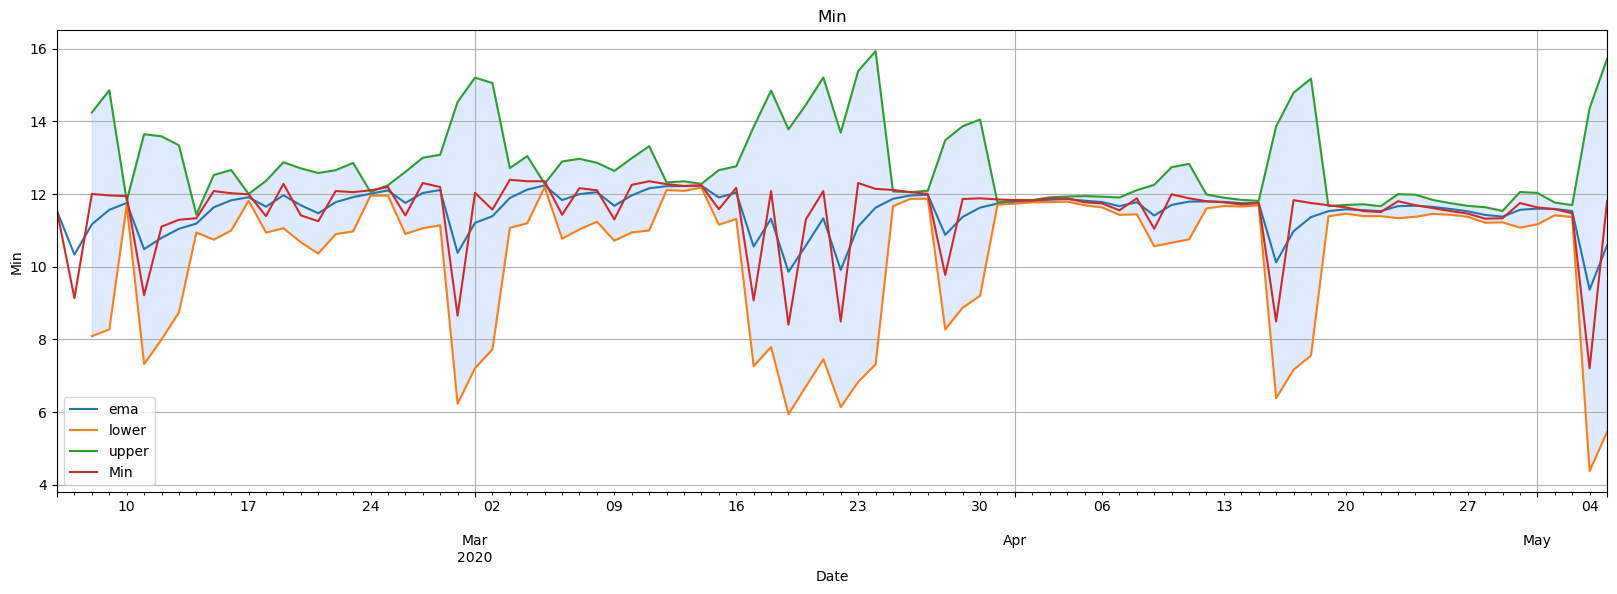

Anamolies for EMA_Min values
 Empty DataFrame
Columns: [Date, Min, Min_EMA]
Index: []


In [121]:
bands= predict_EMA('Min')
bands.reset_index(inplace=True)
min= df['Min'].min()
bands['lower'].fillna(min , inplace=True)
df['Min_EMA']= bands['lower'].copy()
print('Anamolies for EMA_Min values\n', df[df['Min']<df['Min_EMA']][['Date','Min', 'Min_EMA']])

<Figure size 2000x600 with 0 Axes>

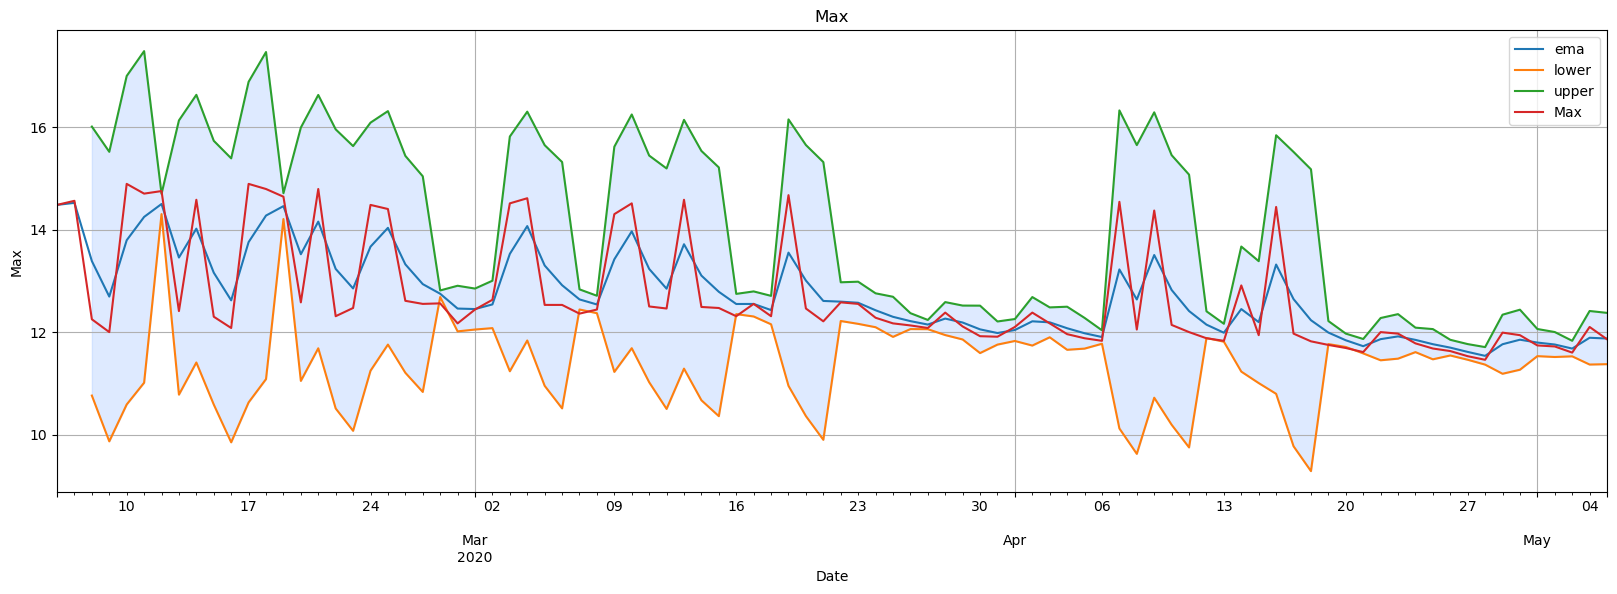

Anamolies for EMA_Max values
         Date    Max   Max_EMA
6 2020-02-12  14.75  14.69479


In [123]:
bands = predict_EMA('Max')
bands.reset_index(inplace=True)
max= df['Max'].max()
bands['upper'].fillna(max , inplace=True)
df['Max_EMA']= bands['upper'].copy()
print('Anamolies for EMA_Max values\n', df[df['Max']>df['Max_EMA']][['Date','Max', 'Max_EMA']])

<Figure size 2000x600 with 0 Axes>

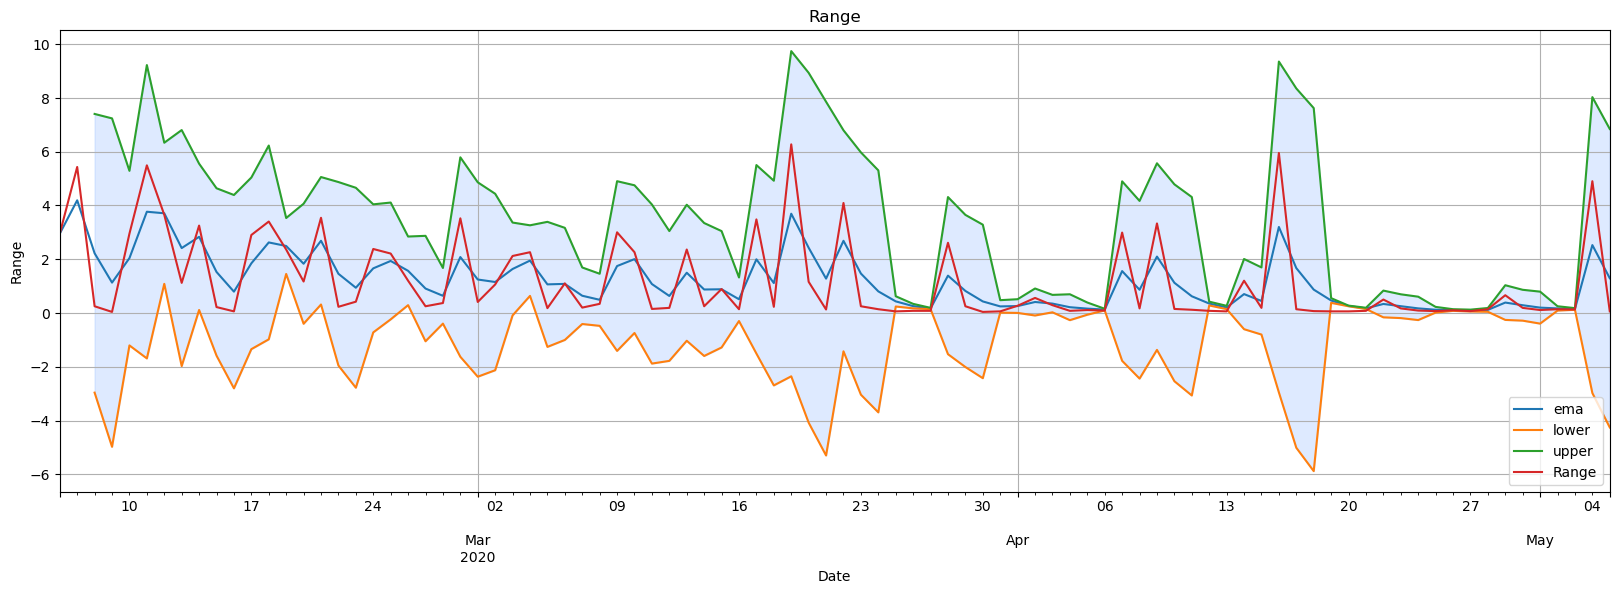

Anamolies for EMA_Range values
 Empty DataFrame
Columns: [Date, Range, Range_EMA]
Index: []


In [125]:
bands = predict_EMA('Range')
bands.reset_index(inplace=True)
max= df['Range'].max()
bands['upper'].fillna(max , inplace=True)
df['Range_EMA']= bands['upper'].copy()
print('Anamolies for EMA_Range values\n', df[df['Range']>df['Range_EMA']][['Date','Range', 'Range_EMA']])

In [127]:
anomaly['Min_anomaly_EMA']= df['Min']
anomaly['Max_anomaly_EMA']= df['Max']
anomaly['Range_anomaly_EMA']= df['Range']

anomaly['Min_anomaly_EMA'][df['Min']<df['Min_EMA']]= 'anomaly'
anomaly['Min_anomaly_EMA'][df['Min']>=df['Min_EMA']]= ''

anomaly['Max_anomaly_EMA'][df['Max']>df['Max_EMA']]= 'anomaly'
anomaly['Max_anomaly_EMA'][df['Max']<=df['Max_EMA']]= ''

anomaly['Range_anomaly_EMA'][df['Range']>df['Range_EMA']]= 'anomaly'
anomaly['Range_anomaly_EMA'][df['Range']<=df['Range_EMA']]= ''

In [129]:
showSummary('9px')

Number of detected anomalies:  22


,Date,Day,Min,Max,Range,Min_anomaly_Prophet,Max_anomaly_Prophet,Range_anomaly_Prophet,Min_anomaly_Calculated,Max_anomaly_Calculated,Range_anomaly_Calculated,Min_anomaly_SMA,Max_anomaly_SMA,Range_anomaly_SMA,Min_anomaly_EMA,Max_anomaly_EMA,Range_anomaly_EMA
1,2020-02-07 00:00:00,Friday,9.130000,14.560000,5.430000,anomaly,,anomaly,anomaly,,anomaly,,,,,,
4,2020-02-10 00:00:00,Monday,11.940000,14.890000,2.950000,,,,,anomaly,,,,,,,
5,2020-02-11 00:00:00,Tuesday,9.210000,14.700000,5.490000,anomaly,,anomaly,anomaly,,anomaly,,,,,,
6,2020-02-12 00:00:00,Wednesday,11.100000,14.750000,3.650000,,anomaly,,,,,,,,,anomaly,
11,2020-02-17 00:00:00,Monday,11.990000,14.890000,2.900000,,anomaly,,,anomaly,,,,,,,
13,2020-02-19 00:00:00,Wednesday,12.280000,14.640000,2.360000,,anomaly,,,,,,,,,,
15,2020-02-21 00:00:00,Friday,11.250000,14.790000,3.540000,,anomaly,,,,,,,,,,
18,2020-02-24 00:00:00,Monday,12.100000,14.480000,2.380000,,anomaly,,,,,,,,,,
23,2020-02-29 00:00:00,Saturday,8.650000,12.170000,3.520000,anomaly,,anomaly,anomaly,,,anomaly,,,,,
26,2020-03-03 00:00:00,Tuesday,12.390000,14.510000,2.120000,,,,,,,,anomaly,,,,


In [131]:
anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      90 non-null     datetime64[ns]
 1   Day                       90 non-null     object        
 2   Min                       90 non-null     float64       
 3   Max                       90 non-null     float64       
 4   Range                     90 non-null     float64       
 5   Min_anomaly_Prophet       90 non-null     object        
 6   Max_anomaly_Prophet       90 non-null     object        
 7   Range_anomaly_Prophet     90 non-null     object        
 8   Min_anomaly_Calculated    90 non-null     object        
 9   Max_anomaly_Calculated    90 non-null     object        
 10  Range_anomaly_Calculated  90 non-null     object        
 11  Min_anomaly_SMA           90 non-null     object        
 12  Max_anomaly_SMA         

         Date        Day  Vote_Number
1  2020-02-07     Friday            4
4  2020-02-10     Monday            1
5  2020-02-11    Tuesday            4
6  2020-02-12  Wednesday            1
11 2020-02-17     Monday            2
13 2020-02-19  Wednesday            1
15 2020-02-21     Friday            1
18 2020-02-24     Monday            1
23 2020-02-29   Saturday            4
26 2020-03-03    Tuesday            1
27 2020-03-04  Wednesday            1
32 2020-03-09     Monday            1
36 2020-03-13     Friday            1
40 2020-03-17    Tuesday            3
42 2020-03-19   Thursday            5
45 2020-03-22     Sunday            3
51 2020-03-28   Saturday            2
61 2020-04-07    Tuesday            4
63 2020-04-09   Thursday            3
70 2020-04-16   Thursday            8
83 2020-04-29  Wednesday            1
88 2020-05-04     Monday            6


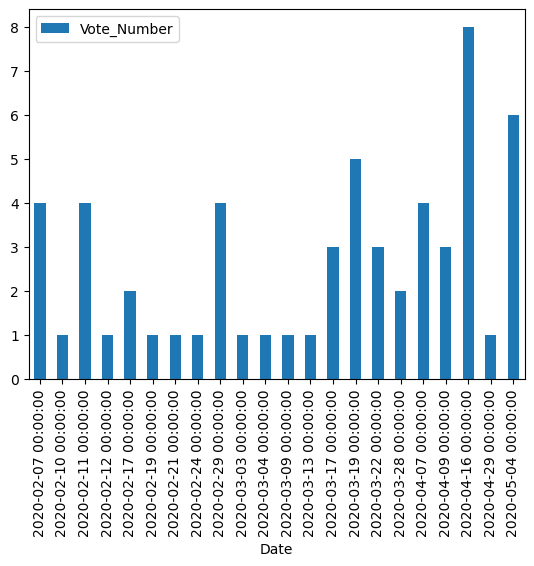

In [153]:
# Anomalileri filtrele
anomaly = anomaly[anomaly.isin(CodesOfInterest).any(axis=1)]

# `pd.Series.value_counts` fonksiyonunu her sütun için uygula
voting = anomaly.iloc[:, 5:14].apply(pd.Series.value_counts, axis=1).fillna(0)

# `Vote_Number` ve `Vote_Ratio` sütunlarını ekle
anomaly['Vote_Number'] = voting.iloc[:, 1]  # Fill missing values if necessary
anomaly['Vote_Ratio'] = (anomaly['Vote_Number'] / 9) * 100  # Update divisor as needed

# Grafik oluştur
anomaly.plot.bar(x='Date', y='Vote_Number')

# Sonuçları yazdır
print(anomaly[['Date', 'Day', 'Vote_Number']])

In [155]:
print("Total Number of detected anomalies: ",len(anomaly))
threshold= 50
print("Number of Anomalies over the threshold ({}%) voting: {} ".format(threshold,len(anomaly[anomaly['Vote_Ratio']>threshold] )))
print(anomaly[anomaly['Vote_Ratio']>threshold][['Date','Day','Vote_Number','Min','Max','Range']])

Total Number of detected anomalies:  22
Number of Anomalies over the threshold (50%) voting: 3 
         Date       Day  Vote_Number   Min    Max  Range
42 2020-03-19  Thursday            5  8.40  14.67   6.27
70 2020-04-16  Thursday            8  8.49  14.44   5.95
88 2020-05-04    Monday            6  7.20  12.10   4.90


In [159]:
anomaly['Vote_Number'].describe()

count    22.000000
mean      2.636364
std       1.965063
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       8.000000
Name: Vote_Number, dtype: float64

In [149]:
anomaly.to_csv('anomaly.csv')